# scamp-technical-assessment

Use the "Run" button to execute the code.

# INSTRUCTIONS :

The given database contains a collection of job postings, some of which are fraudulent. The data contains textual & meta info about these jobs. Study the details of the dataset and find out which industry has the highest number of fake job postings.

Graphically display your answer.

# FUNCTIONAL REQUIREMENTS 

- Approach must be detailed
- Data should be cleaned and scaled if necessary

In [1]:
# Load python packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
#load 'fake_job.csv' dataset from github

fake_job_df = pd.read_csv('https://raw.githubusercontent.com/she-code-africa/SCAMP-Cohort6-Technical-Assessment/master/intermediate/fake_job_postings.csv')
fake_job_df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [3]:
fake_job_df.shape

(17880, 18)

In [4]:
#dataset information

fake_job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
#checking for duplicates

fake_job_df.duplicated().sum()

0

There are no duplicates in the dataset

In [6]:
#checking for missing values in the dataset

fake_job_df.isna().sum().sort_values().to_frame()

,0
job_id,0
has_questions,0
has_company_logo,0
telecommuting,0
fraudulent,0
title,0
description,1
location,346
requirements,2695
company_profile,3308


There are missing/null values in 'location', 'requirements', 'company_profile', 'employment_type', 'industry', 'function', 'required_experience', 'benefits', 'required_education', 'department' and 'salary_range' columns. 

In [7]:
#dropping unnecessary columns with missing values

fake_job_df = fake_job_df.drop(columns=['job_id','salary_range']) #dropped 'job_id' & 'salary_range columns'

fake_job_df = fake_job_df.dropna(subset=['description']) #dropped row with 'NaN' in description column

fake_job_df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
#filing missing values in selected columns

#fill NaN in 'department' column with 'unknown'
fake_job_df['department'] = fake_job_df['department'].fillna('unknown') 

#fill NaN in 'required_education' column with 'unknown'
fake_job_df['required_education'] = fake_job_df['department'].fillna('unknown') 

#fill NaN in 'benefits' column with 'not included'
fake_job_df['benefits'] = fake_job_df['department'].fillna('not included') 

#fill NaN in 'required_experience' column with 'unlisted'
fake_job_df['required_experience'] = fake_job_df['department'].fillna('unlisted') 

#fill NaN in 'industry' column with 'industry_unknown'
fake_job_df['industry'] = fake_job_df['department'].fillna('industry_unknown') 

#fill NaN in 'employment_type' column with 'unknown'
fake_job_df['employment_type'] = fake_job_df['department'].fillna('unknown') 

#fill NaN in 'company_profile' column with 'unknown'
fake_job_df['company_profile'] = fake_job_df['department'].fillna('unknown')

#fill NaN in 'requirements' column with 'unlisted'
fake_job_df['requirements'] = fake_job_df['department'].fillna('unlisted')

#fill NaN in 'location' column with 'unknown location'
fake_job_df['location'] = fake_job_df['department'].fillna('unknown location')

#fill NaN in 'function' column with 'not available'
fake_job_df['function'] = fake_job_df['department'].fillna('not available')

fake_job_df.isna().sum().sort_values().to_frame()

,0
title,0
location,0
department,0
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0
has_company_logo,0
has_questions,0


- Filled columns that weren't previously dropped
- Industry column was not dropped as dropping 4903 rows would greatly reduce the size of our dataset. Instead it was filled with 'unknown'

In [9]:
fake_job_df.fraudulent.value_counts()

0    17014
1      865
Name: fraudulent, dtype: int64

There are 865 fraudulent jobs postings in the dataset and 17014 non-fraudulent/real job postings

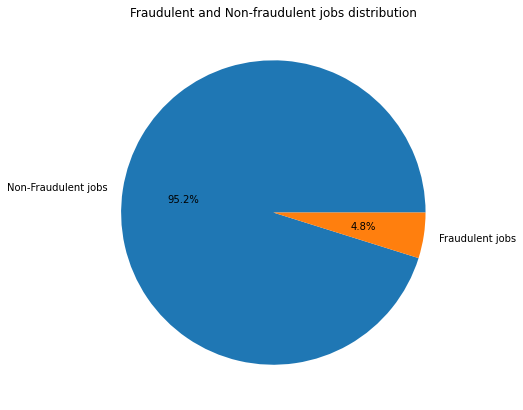

In [10]:
#plot a pie chart of fraudulent and non-fraudulent jobs distribution

plt.figure(figsize=(9,7))
fake_job_df['fraudulent'].value_counts().plot(kind='pie', labels = ['Non-Fraudulent jobs','Fraudulent jobs'], autopct='%.1f%%')
plt.title('Fraudulent and Non-fraudulent jobs distribution')
plt.ylabel(" ") #removes plot ylabel
plt.show()

In [11]:
#creating a subset of non-fraudulent job postings

non_fraudulent_jobs = fake_job_df[fake_job_df['fraudulent']==0]
non_fraudulent_jobs

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,Marketing,Marketing,Marketing,"Food52, a fast-growing, James Beard Award-winn...",Marketing,Marketing,0,1,0,Marketing,Marketing,Marketing,Marketing,Marketing,0
1,Customer Service - Cloud Video Production,Success,Success,Success,Organised - Focused - Vibrant - Awesome!Do you...,Success,Success,0,1,0,Success,Success,Success,Success,Success,0
2,Commissioning Machinery Assistant (CMA),unknown,unknown,unknown,"Our client, located in Houston, is actively se...",unknown,unknown,0,1,0,unknown,unknown,unknown,unknown,unknown,0
3,Account Executive - Washington DC,Sales,Sales,Sales,THE COMPANY: ESRI – Environmental Systems Rese...,Sales,Sales,0,1,0,Sales,Sales,Sales,Sales,Sales,0
4,Bill Review Manager,unknown,unknown,unknown,JOB TITLE: Itemization Review ManagerLOCATION:...,unknown,unknown,0,1,1,unknown,unknown,unknown,unknown,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Sales,Sales,Sales,Just in case this is the first time you’ve vis...,Sales,Sales,0,1,1,Sales,Sales,Sales,Sales,Sales,0
17876,Payroll Accountant,Accounting,Accounting,Accounting,The Payroll Accountant will focus primarily on...,Accounting,Accounting,0,1,1,Accounting,Accounting,Accounting,Accounting,Accounting,0
17877,Project Cost Control Staff Engineer - Cost Con...,unknown,unknown,unknown,Experienced Project Cost Control Staff Enginee...,unknown,unknown,0,0,0,unknown,unknown,unknown,unknown,unknown,0
17878,Graphic Designer,unknown,unknown,unknown,Nemsia Studios is looking for an experienced v...,unknown,unknown,0,0,1,unknown,unknown,unknown,unknown,unknown,0


In [12]:
#creating a subset of fraudulent job postings

fraudulent_jobs = fake_job_df[fake_job_df['fraudulent']==1]
fraudulent_jobs

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,Oil & Energy,Oil & Energy,Oil & Energy,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...",Oil & Energy,Oil & Energy,0,1,1,Oil & Energy,Oil & Energy,Oil & Energy,Oil & Energy,Oil & Energy,1
144,Forward Cap.,unknown,unknown,unknown,The group has raised a fund for the purchase o...,unknown,unknown,0,0,0,unknown,unknown,unknown,unknown,unknown,1
173,Technician Instrument & Controls,Power Plant & Energy,Power Plant & Energy,Power Plant & Energy,Technician Instrument &amp; ControlsLocation D...,Power Plant & Energy,Power Plant & Energy,0,1,1,Power Plant & Energy,Power Plant & Energy,Power Plant & Energy,Power Plant & Energy,Power Plant & Energy,1
180,Sales Executive,Sales,Sales,Sales,Sales Executive,Sales,Sales,0,0,0,Sales,Sales,Sales,Sales,Sales,1
215,IC&E Technician Mt Poso,Oil & Energy,Oil & Energy,Oil & Energy,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...",Oil & Energy,Oil & Energy,0,1,1,Oil & Energy,Oil & Energy,Oil & Energy,Oil & Energy,Oil & Energy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,unknown,unknown,unknown,Student Positions Part-Time and Full-Time.You ...,unknown,unknown,0,0,0,unknown,unknown,unknown,unknown,unknown,1
17828,Sales Associate,Sales and Marketing,Sales and Marketing,Sales and Marketing,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,Sales and Marketing,Sales and Marketing,0,0,1,Sales and Marketing,Sales and Marketing,Sales and Marketing,Sales and Marketing,Sales and Marketing,1
17829,Android Developer,unknown,unknown,unknown,inFullMobile Sp. z o.o. is a mobile software d...,unknown,unknown,0,0,0,unknown,unknown,unknown,unknown,unknown,1
17830,Payroll Clerk,unknown,unknown,unknown,JOB DESCRIPTIONWe are seeking a full time payr...,unknown,unknown,0,0,0,unknown,unknown,unknown,unknown,unknown,1


In [13]:
fraudulent_jobs['industry'].value_counts().nlargest(5)

unknown                   530
Engineering                46
Clerical                   27
Oil & Energy               24
Information Technology     15
Name: industry, dtype: int64

Engineering Industry has the highest fake jobs postings with 46 fake job postings. The previously missing industry rows that were filled with unknown account for 530 fake job postings.

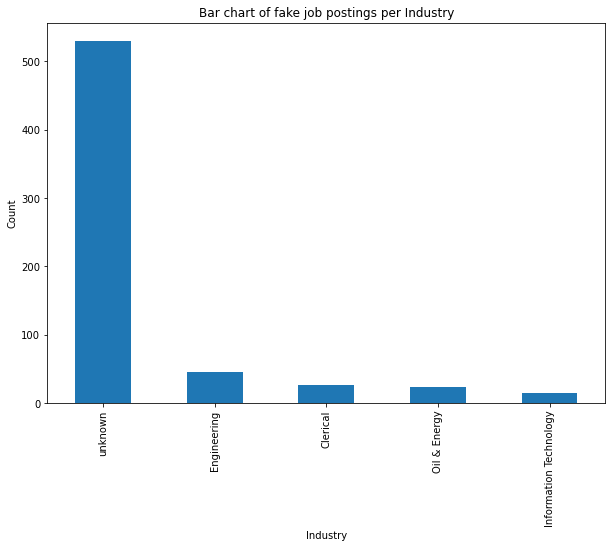

In [14]:
plt.figure(figsize=(10,7))
fraudulent_jobs['industry'].value_counts().nlargest(5).plot(kind='bar')
plt.title('Bar chart of fake job postings per Industry')
plt.ylabel('Count')
plt.xlabel('Industry')
plt.show()

### CONCLUSION

- The dataset had 17880 rows and 18 columns.
- There are  17014 real job postings and 865 fake job postings.
- The Engineering industry had the highest number of fake job postings.